# Logistic Map Simulation

> "Simulate the logistic map with Python"

- toc:true
- branch: master
- badges: false
- comments: false
- author: Alexandros Giavaras
- categories: [logistic-map, Python, simulation, numerics]

##  Logistic Map Simulation With Python

The <a href="https://en.wikipedia.org/wiki/Logistic_map">logistic map</a> is a discrete time system of the form

$$x_{k+1} = \beta x_k (1-x_k)$$

The logistic map is a polynomial mapping (equivalently, recurrence relation) of degree 2, often cited as an archetypal example of how complex, chaotic behaviour can arise from very simple non-linear dynamical equations. The map was popularized in a 1976 paper by the biologist Robert May,[1] in part as a discrete-time demographic model analogous to the logistic equation written down by Pierre François Verhulst

In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
betas = np.linspace(0.0, 4.0, 400)


In [29]:
def get_steady_state(xinit, nitrs, beta):
    xold = xinit
    for itr in range(nitrs):
        xnew = (xold - xold**2)*beta
        xold = xnew
    return xold    

In [38]:
def iterate(xinit, betas, use_steady_state, steady_state_itrs, itrs):
    
    xvals = []
    beta_vals = []
    xinit = xinit
    for beta in betas:
        #print("Working with beta={0}".format(beta))
        
        if use_steady_state:
            xold = get_steady_state(xinit=xinit, nitrs=steady_state_itrs, beta=beta)
        else:
            xold = xinit
        xss = xold
        for i in range(itrs):
            xnew = (xold - xold**2)*beta
            xold = xnew
            beta_vals.append(beta)
            xvals.append(xnew)
        
            # if this is the case 
            # the solution is boring :)
            if np.abs(xnew - xss) < 0.001:
                break
    return beta_vals, xvals
    

In [39]:
beta_vals, xvals = iterate(xinit=0.5, betas=betas, use_steady_state=True, steady_state_itrs=2000, itrs=1000)


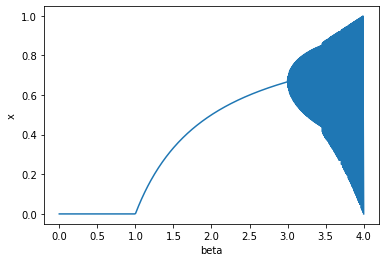

In [40]:
plt.plot(beta_vals, xvals)
plt.xlabel("beta")
plt.ylabel("x")
plt.show()

In [41]:
beta_vals, xvals = iterate(xinit=0.5, betas=betas, use_steady_state=False, steady_state_itrs=2000, itrs=1000)

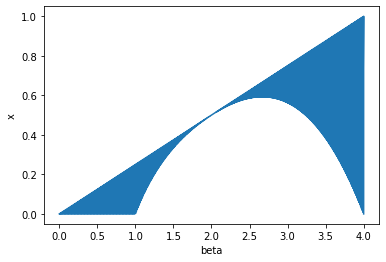

In [42]:
plt.plot(beta_vals, xvals)
plt.xlabel("beta")
plt.ylabel("x")
plt.show()

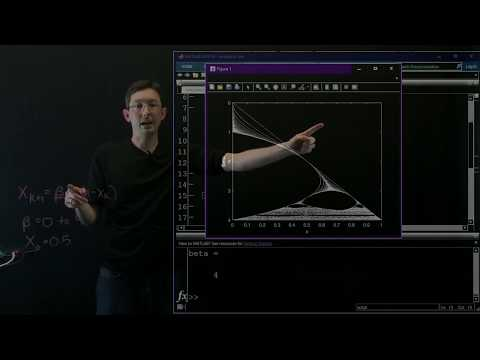

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('_BvAkyuWhOI', width=800, height=300)